## Disciplina Machine Learning 
### Aula 04 - Aprendizagem Supervisionada - Parte II
### Prof. Antonio Willian Sousa

#### Classificador Bayesiano (Naive Bayes)

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')

##### Teorema de Bayes aplicado ao conjunto de dados de clientes

Podemos avaliar as probabilidade de categorias, de acordo com os atributos cujos valores conhecemos.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import pandas as pd

# Lê o dataset de carros
carros = pd.read_csv("carros_categorical.csv")

# Seleciona apenas as colunas necessárias
X = carros.loc[:, 'ano':'preco_venda'].to_numpy()

y = carros['label'].to_numpy()

# Divide o conjunto em treinamento e teste, na proporção 80-20
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.20, 
                                                        stratify=y, 
                                                        random_state=123, 
                                                        shuffle=True)

caracteristicas = list(carros.columns[2:-1])
carros ['fabricante'] = carros ['fabricante'].astype('category')
categorias = carros['fabricante'].cat.categories

print("Tamanho do conjunto de treinamento: {}".format(len(X_treino)))
print("Tamanho do conjunto de testes: {}".format(len(X_teste)))
print("Quantidade de características: {}".format(len(caracteristicas)))
print("Quantidade de classes ou categorias: {}".format(len(carros ['fabricante'].cat.categories)))

Tamanho do conjunto de treinamento: 9427
Tamanho do conjunto de testes: 2357
Quantidade de características: 14
Quantidade de classes ou categorias: 38


In [7]:
carros['fabricante'].describe()


count         11784
unique           38
top       Chevrolet
freq           1123
Name: fabricante, dtype: object

In [8]:
# Treina um algoritmo bayesiano com os dados
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_treino, y_treino)

y_predicao = gnb.predict(X_teste)

print("Total de classificações erradas de um total de {} instâncias : {}".format( 
      X_teste.shape[0], (y_teste != y_predicao).sum()))

Total de classificações erradas de um total de 2357 instâncias : 11


In [9]:
# Avalia o desempenho do modelo treinado
import numpy as np
from sklearn.metrics import classification_report

print("Total de categorias: {}".format(len(categorias)))

cats_teste = np.unique(y_teste).tolist()
code_cats = carros['fabricante'].cat.categories
print("Total de categorias de teste: {}".format(len(code_cats)))

Total de categorias: 38
Total de categorias de teste: 38


<IPython.core.display.Javascript object>


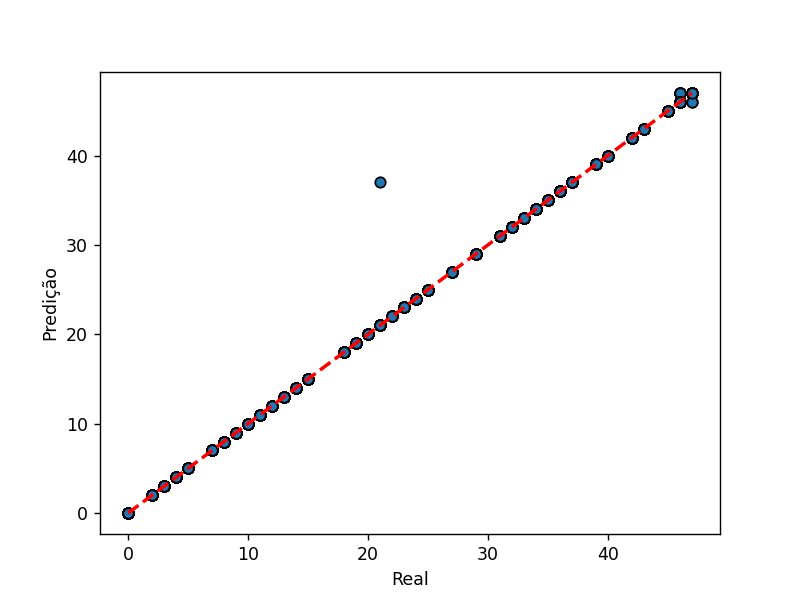

<ipython-input-11-c589ebe44f47>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'k--', lw=2, color='red')


In [11]:
# Plota o grafico de resultados
fig, ax = plt.subplots()
ax.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'k--', lw=2, color='red')
ax.scatter(y_teste, y_predicao, edgecolors=(0, 0, 0))
ax.set_xlabel('Real')
ax.set_ylabel('Predição')
plt.show()

In [13]:
relatorio = classification_report(y_teste, y_predicao, target_names=code_cats)
print(str(relatorio))


               precision    recall  f1-score   support

        Acura       1.00      1.00      1.00        50
 Aston Martin       1.00      1.00      1.00        19
         Audi       1.00      1.00      1.00        66
          BMW       1.00      1.00      1.00        67
      Bentley       1.00      1.00      1.00        15
        Buick       1.00      1.00      1.00        39
     Cadillac       1.00      1.00      1.00        79
    Chevrolet       1.00      1.00      1.00       225
     Chrysler       1.00      1.00      1.00        37
        Dodge       1.00      1.00      1.00       125
         FIAT       1.00      1.00      1.00        12
      Ferrari       1.00      1.00      1.00        14
         Ford       1.00      1.00      1.00       176
          GMC       1.00      1.00      1.00       103
        Honda       1.00      1.00      1.00        90
      Hyundai       1.00      1.00      1.00        61
     Infiniti       1.00      1.00      1.00        66
         

### Executando a classificação para um conjunto maior de classes

Tamanho do conjunto de treinamento: 7378
Tamanho do conjunto de testes: 1845
Quantidade de características: 14
Quantidade de classes ou categorias: 381
Total de classificações erradas de um total de 1845 instâncias : 177
Total de categorias: 381
Total de categorias de teste: 381


<IPython.core.display.Javascript object>


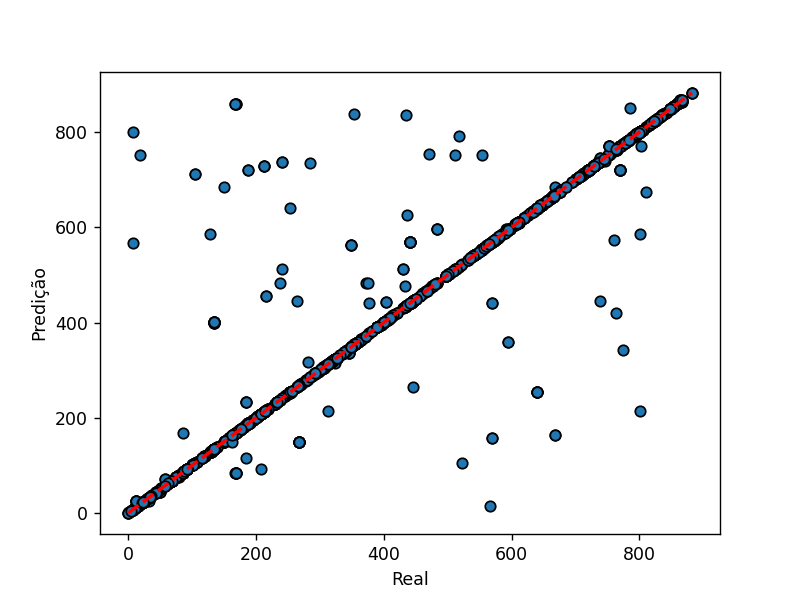

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import pandas as pd

COLUMN_LABEL='modelo'

# Lê o dataset de carros
df_carros = pd.read_csv("carros_modelos_categorical.csv")
carros = df_carros.groupby("modelo").filter(lambda x: len(x) > 10)

# Seleciona apenas as colunas necessárias
X = carros.loc[:, 'ano':'preco_venda'].to_numpy()
y = carros['label'].to_numpy()

# Divide o conjunto em treinamento e teste, na proporção 80-20
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.20, 
                                                        stratify=y, 
                                                        random_state=123, 
                                                        shuffle=True)

caracteristicas = list(carros.columns[2:-1])
carros ['modelo'] = carros ['modelo'].astype('category')
categorias = carros['modelo'].cat.categories

print("Tamanho do conjunto de treinamento: {}".format(len(X_treino)))
print("Tamanho do conjunto de testes: {}".format(len(X_teste)))
print("Quantidade de características: {}".format(len(caracteristicas)))
print("Quantidade de classes ou categorias: {}".format(len(categorias)))

carros['fabricante'].describe()

# Treina um algoritmo de árvore de decisão com os dados
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_treino, y_treino)

y_predicao = gnb.predict(X_teste)

print("Total de classificações erradas de um total de {} instâncias : {}".format( 
      X_teste.shape[0], (y_teste != y_predicao).sum()))

# Avalia o desempenho do modelo treinado
import numpy as np
from sklearn.metrics import classification_report

print("Total de categorias: {}".format(len(categorias)))
cats_teste = np.unique(y_teste).tolist()
code_cats = carros['modelo'].cat.categories
print("Total de categorias de teste: {}".format(len(code_cats)))

resultados = classification_report(y_teste, y_predicao, target_names=code_cats,output_dict=True)

# Plota o grafico de resultados
fig, ax = plt.subplots()
ax.scatter(y_teste, y_predicao, edgecolors=(0, 0, 0))
ax.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'k--', lw=2, color='red')
ax.set_xlabel('Real')
ax.set_ylabel('Predição')
plt.show()

Total de classificações erradas de um total de 1845 instâncias : 177
	Precisão: 0.925
	Recall: 0.912
	F1: 0.904



<IPython.core.display.Javascript object>


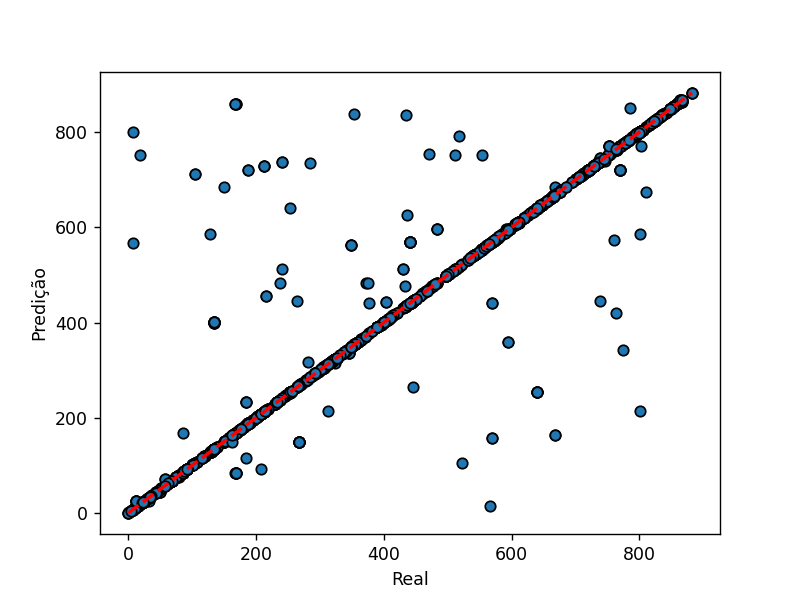

Total de classificações erradas de um total de 1845 instâncias : 119
	Precisão: 0.945
	Recall: 0.938
	F1: 0.935



<IPython.core.display.Javascript object>


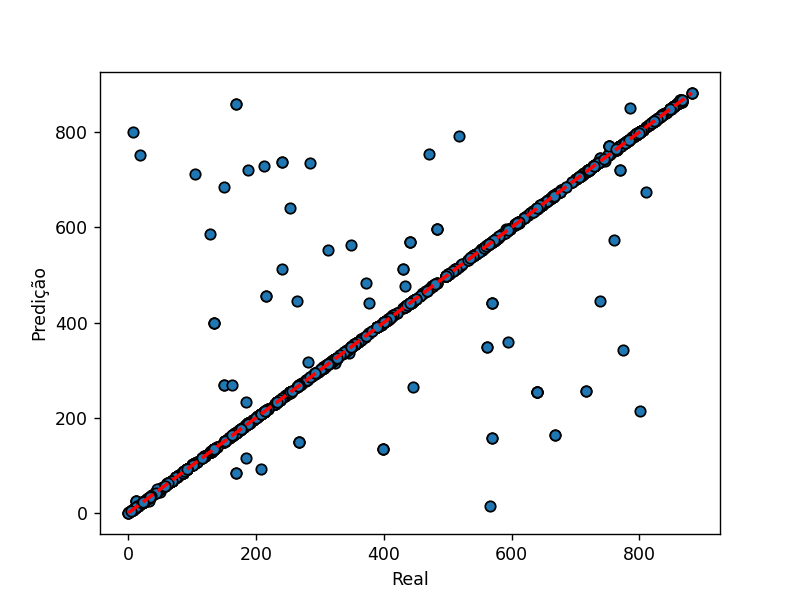

Total de classificações erradas de um total de 1845 instâncias : 151
	Precisão: 0.931
	Recall: 0.926
	F1: 0.919



<IPython.core.display.Javascript object>


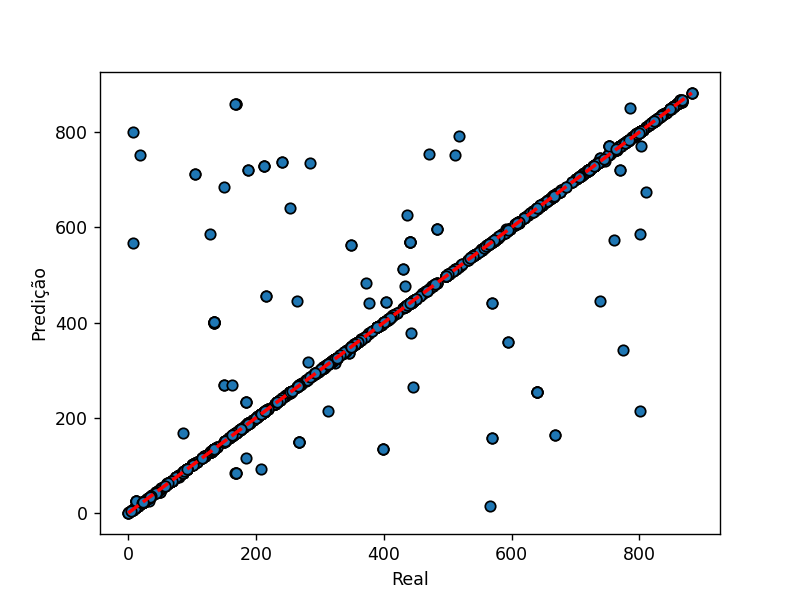

In [19]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)

# Metodo isotonico
isotonic = CalibratedClassifierCV(gnb, cv=4, method='isotonic')

# Metodo sigmoid
sigmoid = CalibratedClassifierCV(gnb, cv=4, method='sigmoid')

isotonic.fit(X_treino, y_treino)
sigmoid.fit(X_treino, y_treino)

predicoes = [ p.predict(X_teste) for p in [gnb, isotonic, sigmoid] ]

for y_predicao in predicoes:
    print("Total de classificações erradas de um total de {} instâncias : {}".format( 
      X_teste.shape[0], (y_teste != y_predicao).sum()))
    print("\tPrecisão: %1.3f" % precision_score(y_teste, y_predicao, average='macro')) 
    print("\tRecall: %1.3f" % recall_score(y_teste, y_predicao, average='macro')) 
    print("\tF1: %1.3f\n" % f1_score(y_teste, y_predicao, average='macro'))
    
    resultados = classification_report(y_teste, y_predicao, target_names=code_cats)
    
    # Plota o grafico de resultados
    fig, ax = plt.subplots()
    ax.scatter(y_teste, y_predicao, edgecolors=(0, 0, 0))    
    ax.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'k--', lw=2, color='red')
    ax.set_xlabel('Real')
    ax.set_ylabel('Predição')
    plt.show()

### Regressão Linear

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import pandas as pd
import numpy as np

VAR1, VAR2 = ('popularidade', 'preco_venda')

# Lê o dataset de carros
df_carros = pd.read_csv("carros_modelos_categorical.csv")

df_2variaveis = carros.loc[:, [VAR1,VAR2] ]

df_2variaveis = df_2variaveis.drop_duplicates(subset=VAR2, keep="last")

df_2variaveis = df_2variaveis.drop_duplicates(subset=VAR1, keep="last")

df_2variaveis

,popularidade,preco_venda
590,819,23890
882,376,2117
991,1715,5576
7826,190,47650
7907,436,21135
8137,258,41475
8726,2202,37995
8917,454,4404
9308,26,28465
9551,617,43525


<IPython.core.display.Javascript object>


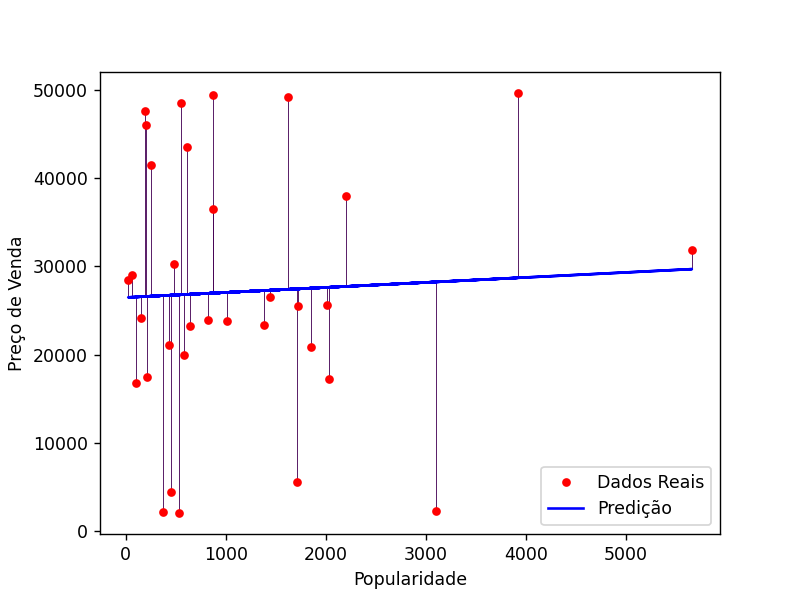

In [29]:
x = df_2variaveis[VAR1].to_numpy()
y = df_2variaveis[VAR2].to_numpy()
n = len(df_2variaveis[VAR1])
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  
y_ = lr.predict(x[:, np.newaxis])

segments = [[[x[i], y[i]], [x[i], y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))


fig = plt.figure()
plt.plot(x, y, 'r.', markersize=8)
plt.plot(x, y_, 'b-')
plt.gca().add_collection(lc)
plt.legend(('Dados Reais', 'Predição'), loc='lower right')
plt.xlabel('Popularidade')
plt.ylabel('Preço de Venda')
plt.title('')
plt.show()

In [27]:
pop_media = carros['popularidade'].mean()

carros['popular'] = np.where(carros['popularidade'] > carros['popularidade'].mean(), 1, 0)

carros

,fabricante,modelo,ano,combustivel,hp,cilindros,tipo_transmissao,tracao,num_portas,categoria,tamanho,estilo,km_por_l_estrada,km_por_l_cidade,popularidade,preco_venda,label,popular
0,BMW,1 Series M,2011,7,335.0,6.0,3,3,2.0,3,0,5,26,19,3916,46135,1,1
1,BMW,1 Series,2011,7,300.0,6.0,3,3,2.0,68,0,4,28,19,3916,40650,0,1
2,BMW,1 Series,2011,7,300.0,6.0,3,3,2.0,65,0,5,28,20,3916,36350,0,1
3,BMW,1 Series,2011,7,230.0,6.0,3,3,2.0,68,0,5,28,18,3916,29450,0,1
4,BMW,1 Series,2011,7,230.0,6.0,3,3,2.0,64,0,4,28,18,3916,34500,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11767,BMW,Z4,2015,7,240.0,4.0,3,3,2.0,68,0,4,34,22,3916,48950,869,1
11771,BMW,Z4,2016,7,240.0,4.0,3,3,2.0,68,0,4,34,22,3916,49700,869,1
11776,Acura,ZDX,2011,7,300.0,6.0,0,1,4.0,19,2,2,23,16,204,46020,872,0
11779,Acura,ZDX,2012,7,300.0,6.0,0,1,4.0,19,2,2,23,16,204,46120,872,0


#### Classificação de automóveis em categorias: popular e não-popular

In [30]:
from sklearn import linear_model
from scipy.special import expit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from scipy.special import expit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lê o dataset de carros
df_carros = pd.read_csv("carros_modelos_categorical.csv")
carros = df_carros.groupby("modelo").filter(lambda x: len(x) > 10)

# Seleciona apenas as colunas necessárias
carros['label'] = np.where(carros['popularidade'] > carros['popularidade'].mean(), 1, 0)

y = carros['label'].to_numpy()

carros = carros.drop(columns=['fabricante','modelo','popularidade'])

X = carros.iloc[:, :-1].to_numpy()
y = carros.iloc[:, -1].to_numpy()


# Divide o conjunto em treinamento e teste, na proporção 80-20
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.20, 
                                                        stratify=y, 
                                                        random_state=123, 
                                                        shuffle=True)

# Classificacao Regressao Logistica

clf_logistica = linear_model.LogisticRegression(C=1e5)

clf_logistica.fit(X_treino, y_treino)

y_pred_logistica = clf_logistica.predict(X_teste)


              precision    recall  f1-score   support

 não popular       0.62      0.97      0.76      4521
     popular       0.60      0.08      0.14      2857

    accuracy                           0.62      7378
   macro avg       0.61      0.52      0.45      7378
weighted avg       0.62      0.62      0.52      7378



<IPython.core.display.Javascript object>


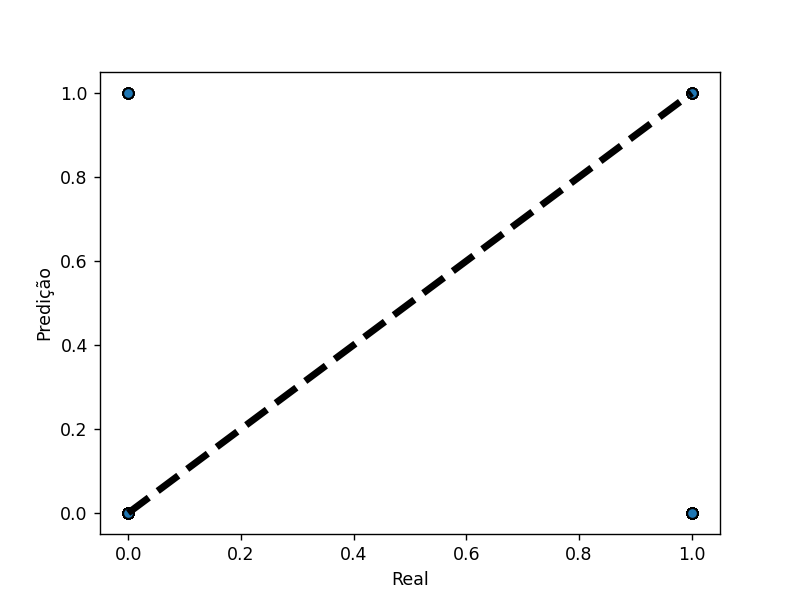

<IPython.core.display.Javascript object>


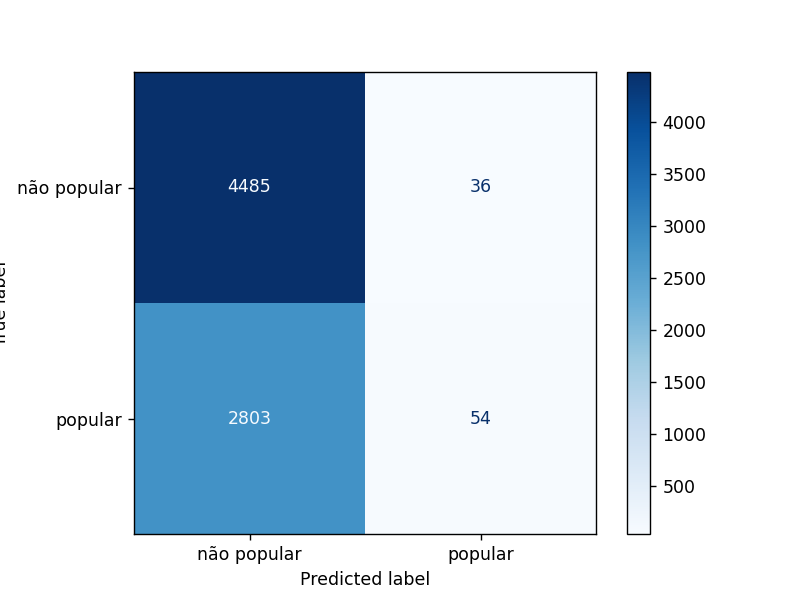

In [31]:
# Plota resultados
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

categorias = ['não popular', 'popular']
cv_results = cross_val_predict(clf_logistica, X_treino, y_treino, cv=3)
print(classification_report(y_treino, cv_results, target_names=categorias))

fig, ax = plt.subplots()
ax.scatter(y_teste, y_pred_logistica, edgecolors=(0, 0, 0))
ax.plot([y_treino.min(), y_treino.max()], [y_treino.min(), y_treino.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predição')
plt.show()

# Plota matriz de confusao
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf_logistica, X_treino, y_treino,
                                 display_labels=categorias,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
plt.show()

#### Classificação de automóveis em categorias: popular e não-popular
#### Usando one-hot encoder

In [32]:
from sklearn import linear_model
from scipy.special import expit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from scipy.special import expit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lê o dataset de carros
df_carros = pd.read_csv("carros_modelos_categorical.csv")
carros = df_carros.groupby("modelo").filter(lambda x: len(x) > 10)

# Seleciona apenas as colunas necessárias
carros['label'] = np.where(carros['popularidade'] > carros['popularidade'].mean(), 1, 0)
y = carros['label'].to_numpy()

carros = pd.concat([pd.get_dummies(carros["tipo_transmissao"], prefix='tipo_transmissao', drop_first=True),
                    pd.get_dummies(carros["tracao"], prefix='tracao', drop_first=True),
                    pd.get_dummies(carros["combustivel"], prefix='combustivel', drop_first=True),
                    pd.get_dummies(carros["tamanho"], prefix='tamanho', drop_first=True),
                    pd.get_dummies(carros["estilo"], prefix='estilo', drop_first=True),
                   carros], axis=1)

carros = carros.drop(columns=['fabricante','modelo','popularidade', 'tipo_transmissao', 
                              'tracao','combustivel','tamanho','estilo','preco_venda'])

X = carros.iloc[:, :-1].to_numpy() 
y = carros.iloc[:, -1].to_numpy()


# Divide o conjunto em treinamento e teste, na proporção 80-20
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.20, 
                                                        stratify=y, 
                                                        random_state=123, 
                                                        shuffle=True)

# Classificacao Regressao Logistica
clf_logistica = linear_model.LogisticRegression(C=1e5, max_iter=10000, class_weight={0: 0.7, 1: 0.9})
clf_logistica.fit(X_treino, y_treino)
y_pred_logistica = clf_logistica.predict(X_teste)
carros

,tipo_transmissao_1,tipo_transmissao_2,tipo_transmissao_3,tipo_transmissao_4,tracao_1,tracao_2,tracao_3,combustivel_2,combustivel_3,combustivel_4,...,estilo_14,estilo_15,ano,hp,cilindros,num_portas,categoria,km_por_l_estrada,km_por_l_cidade,label
1,0,0,1,0,0,0,1,0,0,0,...,0,0,2011,300.0,6.0,2.0,68,28,19,1
2,0,0,1,0,0,0,1,0,0,0,...,0,0,2011,300.0,6.0,2.0,65,28,20,1
3,0,0,1,0,0,0,1,0,0,0,...,0,0,2011,230.0,6.0,2.0,68,28,18,1
4,0,0,1,0,0,0,1,0,0,0,...,0,0,2011,230.0,6.0,2.0,64,28,18,1
5,0,0,1,0,0,0,1,0,0,0,...,0,0,2012,230.0,6.0,2.0,68,28,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11746,0,0,0,0,0,0,1,0,1,0,...,0,0,2017,355.0,8.0,4.0,49,23,16,0
11747,0,0,0,0,0,0,0,0,1,0,...,0,0,2017,355.0,8.0,4.0,49,22,16,0
11748,0,0,0,0,0,0,1,0,0,0,...,0,0,2017,420.0,8.0,4.0,70,22,15,0
11749,0,0,0,0,0,0,0,0,1,0,...,0,0,2017,355.0,8.0,4.0,49,22,16,0


Coeficientes: 
 [[ 4.04844257e+02  3.89472152e+03  2.79841562e+02  3.94009026e+03
  -8.59707189e+02 -1.22024457e+03 -4.99719760e+03 -2.57109267e+01
  -4.19173340e+03  1.07617887e+02  3.97382915e+02  5.35296367e+02
  -2.06967042e+00]]
Coeficiente de determinação: 0.62


<IPython.core.display.Javascript object>


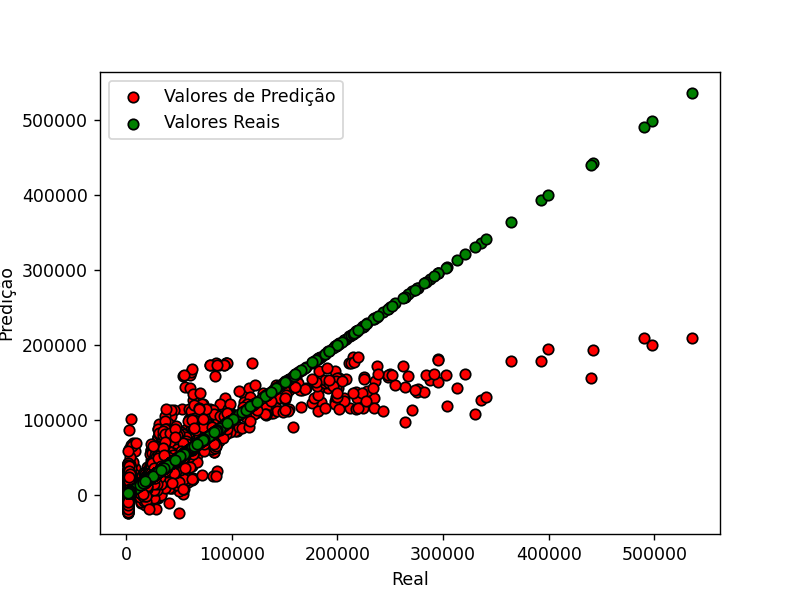

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Lê o dataset de carros
carros = pd.read_csv("carros_modelos_categorical.csv")

# Seleciona apenas as colunas necessárias
X = carros.loc[:, 'ano':'popularidade'].to_numpy() #.reshape(-1, 1)

y = carros['preco_venda'].to_numpy()

# Divide o conjunto em treinamento e teste, na proporção 80-20
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.30)

# Classificacao Regressão Linear
ols = linear_model.LinearRegression(normalize=True)
ols.fit(X_treino, y_treino.reshape((-1, 1)))
y_pred_ols = ols.predict(X_teste)

print('Coeficientes: \n', ols.coef_)
print('Coeficiente de determinação: %.2f'
      % r2_score(y_teste, y_pred_ols))

# Plota resultados
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_teste, y_pred_ols, color='red', edgecolors='black')
ax.scatter(y_teste, y_teste, color='green', edgecolors='black')
ax.set_xlabel('Real')
ax.set_ylabel('Predição')
plt.legend(('Valores de Predição','Valores Reais'),
           loc="best", fontsize='medium')
plt.show()



### Classificação Baseada em Vizinhança (kNN)

Accuracy of kNN with k=5 0.8676171079429735
Accuracy of kNN with k=1 0.9497623896809233
Accuracy of kNN with k=3 0.9497623896809233


<IPython.core.display.Javascript object>


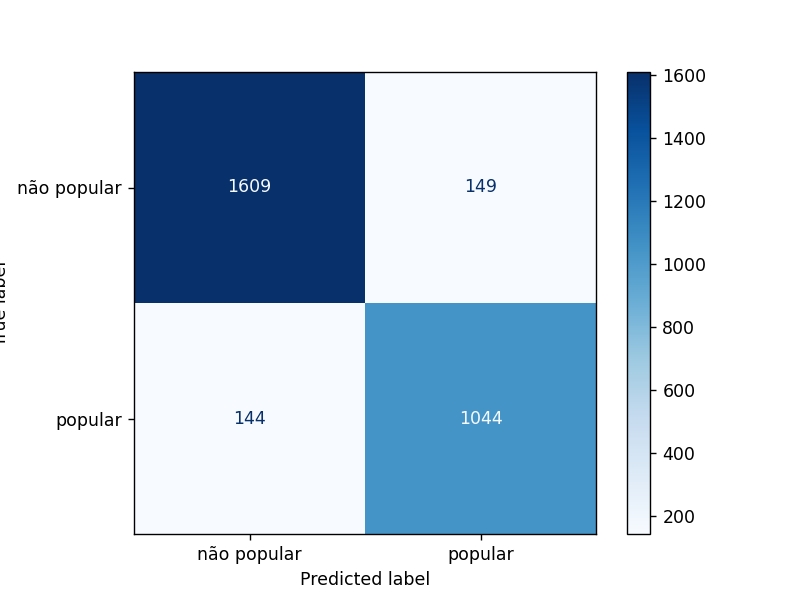

              precision    recall  f1-score   support

 não popular       0.89      0.89      0.89      1758
     popular       0.84      0.83      0.84      1188

    accuracy                           0.87      2946
   macro avg       0.86      0.86      0.86      2946
weighted avg       0.87      0.87      0.87      2946



In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

# Lê o dataset de carros
df_carros = pd.read_csv("carros_modelos_categorical.csv")
carros = df_carros

# Seleciona apenas as colunas necessárias
carros['label'] = np.where(carros['popularidade'] > carros['popularidade'].mean(), 1, 0)
y = carros['label'].to_numpy()

carros = carros.drop(columns=['fabricante','modelo','popularidade','ano'])

X = carros.iloc[:, :-1].to_numpy() 
y = carros.iloc[:, -1].to_numpy()

X = StandardScaler().fit_transform(X)

# Divide o conjunto em treinamento e teste, na proporção 80-20
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.20, 
                                                        stratify=y, 
                                                        random_state=123, 
                                                        shuffle=True)

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state = 0)
knn5 = KNeighborsClassifier(algorithm='ball_tree') #k=5
knn1 = KNeighborsClassifier(n_neighbors=1) #k=1
knn3 = KNeighborsClassifier(n_neighbors=3) #k=10

knn5.fit(X_treino, y_treino)
knn1.fit(X_treino, y_treino)
knn3.fit(X_treino, y_treino)

y_pred_5 = knn5.predict(X_teste)
y_pred_1 = knn1.predict(X_teste)
y_pred_3 = knn1.predict(X_teste)

from sklearn.metrics import accuracy_score
print("Accuracy of kNN with k=5", accuracy_score(y_teste, y_pred_5))
print("Accuracy of kNN with k=1", accuracy_score(y_teste, y_pred_1))
print("Accuracy of kNN with k=3", accuracy_score(y_teste, y_pred_3))

# Plota matriz de confusao
from sklearn.metrics import plot_confusion_matrix
categorias = ['não popular', 'popular']
plot_confusion_matrix(knn3, X_teste, y_teste,
                                 display_labels=categorias,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_teste, y_pred_5, target_names=categorias))

Accuracy of kNN with k=5 0.9497623896809233


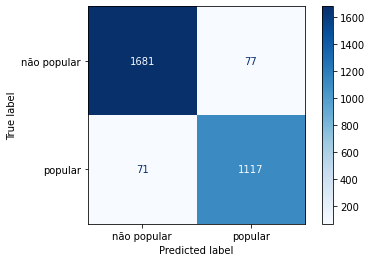

In [62]:
from sklearn.model_selection import GridSearchCV

knn_grid = GridSearchCV(estimator = KNeighborsClassifier(), 
                        param_grid={'n_neighbors': np.arange(1,20)}, cv=5)
knn_grid.fit(X_treino, y_treino)
y_pred = knn_grid.predict(X_teste)

from sklearn.metrics import accuracy_score
print("Accuracy of kNN with k=5", accuracy_score(y_teste, y_pred))

# Plota matriz de confusao
from sklearn.metrics import plot_confusion_matrix
categorias = ['não popular', 'popular']
plot_confusion_matrix(knn_grid, X_teste, y_teste,
                                 display_labels=categorias,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
plt.show()

#### Utilização do kNN para Executar Procedimento de Regressão

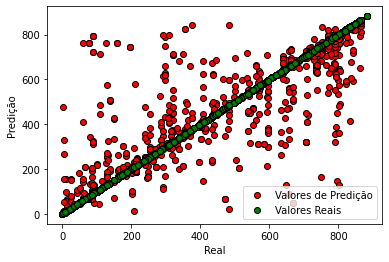

Erro Quadrático Médio: 10143.68
Coeficiente de determinação: 0.85


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

# Lê o dataset de carros
df_carros = pd.read_csv("carros_modelos_categorical.csv")
carros = df_carros.groupby("modelo").filter(lambda x: len(x) > 10)

# Seleciona apenas as colunas necessárias
#X = carros.loc[:, 'ano':'popularidade'].to_numpy() #.reshape(-1, 1)
#y = carros['preco_venda'].to_numpy()

carros = carros.drop(columns=['fabricante','modelo','popularidade','ano'])
#carros = carros.drop(columns=['fabricante','modelo','popularidade', 'tipo_transmissao', 
#                              'tracao','combustivel','tamanho','estilo','preco_venda'])

X = carros.iloc[:, :-1].to_numpy() 
y = carros.iloc[:, -1].to_numpy()

X = StandardScaler().fit_transform(X)

# Divide o conjunto em treinamento e teste, na proporção 80-20
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.30, 
                                                        stratify=y, 
                                                        random_state=123, 
                                                        shuffle=True)

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state = 0)
knn_regr = KNeighborsRegressor(n_neighbors=3, weights='distance')
knn_regr.fit(X_treino, y_treino)
y_pred = knn_regr.predict(X_teste)

fig, ax = plt.subplots()
ax.scatter(y_teste, y_pred, color='red', edgecolors='black')
ax.scatter(y_teste, y_teste, color='green', edgecolors='black')
ax.set_xlabel('Real')
ax.set_ylabel('Predição')
plt.legend(('Valores de Predição','Valores Reais'),
           loc="best", fontsize='medium')
plt.show()

# Erro Quadrático Médio
print('Erro Quadrático Médio: %.2f'
      % mean_squared_error(y_teste, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coeficiente de determinação: %.2f'
      % r2_score(y_teste, y_pred))

In [28]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
carros


,fabricante,modelo,ano,combustivel,hp,cilindros,tipo_transmissao,tracao,num_portas,categoria,tamanho,estilo,km_por_l_estrada,km_por_l_cidade,popularidade,preco_venda,label
0,BMW,1 Series M,2011,7,335.0,6.0,3,3,2.0,3,0,5,26,19,3916,46135,1
1,BMW,1 Series,2011,7,300.0,6.0,3,3,2.0,68,0,4,28,19,3916,40650,0
2,BMW,1 Series,2011,7,300.0,6.0,3,3,2.0,65,0,5,28,20,3916,36350,0
3,BMW,1 Series,2011,7,230.0,6.0,3,3,2.0,68,0,5,28,18,3916,29450,0
4,BMW,1 Series,2011,7,230.0,6.0,3,3,2.0,64,0,4,28,18,3916,34500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11779,Acura,ZDX,2012,7,300.0,6.0,0,1,4.0,19,2,2,23,16,204,46120,872
11780,Acura,ZDX,2012,7,300.0,6.0,0,1,4.0,19,2,2,23,16,204,56670,872
11781,Acura,ZDX,2012,7,300.0,6.0,0,1,4.0,19,2,2,23,16,204,50620,872
11782,Acura,ZDX,2013,5,300.0,6.0,0,1,4.0,19,2,2,23,16,204,50920,872
